In [1]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from random import sample

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


2) Límites del clasificador: Resuelva el problema de dos-elipses utilizando el Clasificador Naive-Bayes  con Gaussianas. Realice una gráfica de la predicción sobre el conjunto de test. Compare el resultado con el obtenido con redes. Resuelva el problema de las espirales-anidadas, y también realice la gráfica y compare con el resultado de redes. Explique por qué se obtienen esos resultados. Use la misma cantidad de datos de entrenamiento y test que en los problemas del práctico de redes.

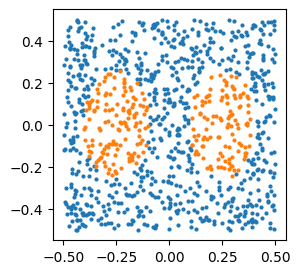

In [2]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]

c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.figure(figsize=(3,3))
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

In [3]:
# conjunto de entrenamiento
ndata = 500
seleccion = sample(list(np.arange(len(x))),ndata)
xdata = df.iloc[seleccion,:2]
ydata = df.iloc[seleccion,2]

# conjunto de test

df_test = pd.read_csv('../tp2/dos_elipses.test')
df_test.columns = ['x','y','clase']

xtest = df_test.iloc[:,:2]
ctest = df_test.iloc[:,2]

In [4]:
len(ctest)

1999

In [5]:
clf = GaussianNB()
clf.fit(xdata, ydata)
prediccion_training = clf.predict(xdata)
correctos, = np.where(prediccion_training == ydata)
print('accuracy',len(correctos)/len(ydata))

accuracy 0.786


In [6]:
prediccion_test = clf.predict(xtest)
correctos, = np.where(prediccion_test == ctest)
print('accuracy',len(correctos)/len(ctest))

accuracy 0.7568784392196098


0.7568784392196098


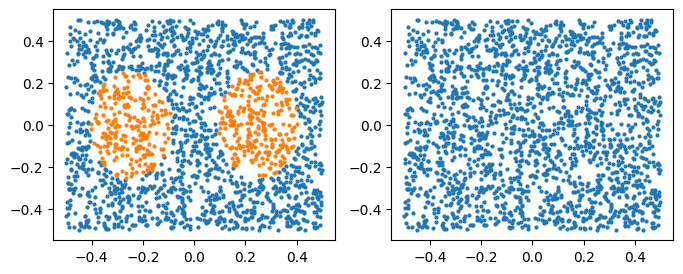

In [7]:
prediccion_test = clf.predict(xtest)
correctos, = np.where(prediccion_test == ctest)
print(len(correctos)/len(ctest))

x = xtest.iloc[:,0]
y = xtest.iloc[:,1]
clase = ctest

c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

In [8]:
df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
ydata = df['clases']
xdata = df.drop(['clases'],axis = 1)

clf = GaussianNB()
clf.fit(xdata, ydata)
prediccion_training = clf.predict(xdata)
correctos, = np.where(prediccion_training == ydata)
print('accuracy',len(correctos)/len(ydata))

df = espirales_anidadas(2000).drop(['r','tita'],axis=1)
ytest = df['clases']
xtest = df.drop(['clases'],axis = 1)


prediccion_test = clf.predict(xtest)
correctos, = np.where(prediccion_test == ytest)
print('accuracy',len(correctos)/len(ytest))

accuracy 0.6
accuracy 0.5755


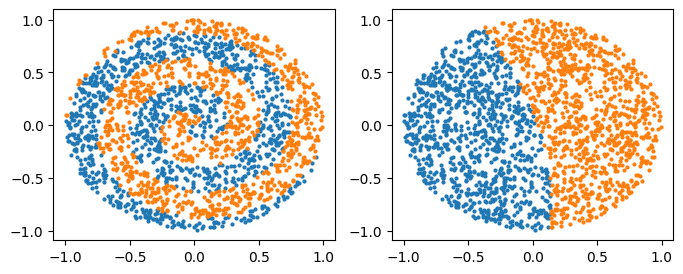

In [9]:
x = xtest.iloc[:,0]
y = xtest.iloc[:,1]
clase = ytest

c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)